In [1]:
%run myfunc.py

In [2]:
#path = 'C:\\Users\Michal\Dropbox\IB_data'
#path = 'C:\\Users\Michal\Desktop'+ '\SPY4Aug17.csv'
path = '/home/octo/Dropbox'+ '/SPY4Aug17.csv'
df=dataframe_notime(path)

/home/octo/Dropbox/DataScience/myfunc.py:40: FutureWarning: pd.rolling_max is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=60).max()
  df['UT']=(pd.rolling_max(df.High,60)+pd.rolling_max(df.P+df.High-df.Low,60))*0.5
/home/octo/Dropbox/DataScience/myfunc.py:41: FutureWarning: pd.rolling_min is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=60).min()
  df['DT']=(pd.rolling_min(df.Low,60)+pd.rolling_min(df.P+df.High-df.Low,60))*0.5


In [3]:
data=df[['Close','price','sigma','P','BA']]
data=data.tail(5000)

In [4]:
#df.shape
data.head()

,Close,price,sigma,P,BA
82410,247.245,247.241308,0.000001,247.245,-1
82411,247.245,247.241485,0.000001,247.245,-1
82412,247.245,247.241783,0.000001,247.245,-1
82413,247.245,247.241824,0.000001,247.245,-1
82414,247.245,247.242006,0.000001,247.245,-1


In [14]:
#ds=df.as_matrix()
#ds[:3]

In [20]:
#BA_list=df.BA.tolist()

In [5]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


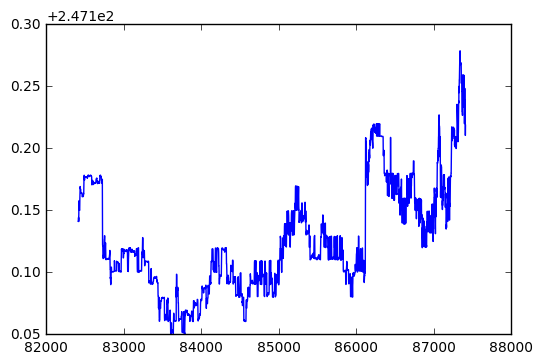

In [6]:
plt.plot(data.price)
plt.show()

In [7]:
dataset = data.values
dataset = dataset.astype('float32')

In [8]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [9]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [10]:
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

4000 1000


In [241]:
#train[:,0]

In [11]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        b = dataset[i:(i+look_back), 1]
        c = dataset[i:(i+look_back), 2]
        d = dataset[i:(i+look_back), 3]
        e=  dataset[i:(i+look_back), 4]
        dataX.append(numpy.c_[a,b,c,d,e])
        #dataX.append(b)
        #dataX.append(c)
        #dataX.append(d)
        #dataX.append(e)
        #dataX.concatenate((a,bT,cT,dT,eT),axis=1)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [12]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train,look_back)
testX, testY = create_dataset(test,look_back)

In [248]:
#trainX.shape

In [249]:
#trainX.shape[0]

In [250]:
#trainX.shape[1]

In [13]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0],trainX.shape[1],trainX.shape[2]))
testX = numpy.reshape(testX, (testX.shape[0],testX.shape[1],testX.shape[2]))

In [253]:
#trainX.shape

In [19]:
epochs=3
batch_size=100

In [20]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back,5)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs, batch_size, verbose=2)

Epoch 1/100
3s - loss: 0.0056
Epoch 2/100
2s - loss: 4.1500e-04
Epoch 3/100
2s - loss: 3.4315e-04
Epoch 4/100
2s - loss: 2.8792e-04
Epoch 5/100
2s - loss: 2.3617e-04
Epoch 6/100
2s - loss: 1.9780e-04
Epoch 7/100
2s - loss: 1.6458e-04
Epoch 8/100
2s - loss: 1.3790e-04
Epoch 9/100
2s - loss: 1.2817e-04
Epoch 10/100
2s - loss: 1.2023e-04
Epoch 11/100
2s - loss: 1.1499e-04
Epoch 12/100
2s - loss: 1.1122e-04
Epoch 13/100
2s - loss: 1.1012e-04
Epoch 14/100
2s - loss: 1.0908e-04
Epoch 15/100
2s - loss: 1.0571e-04
Epoch 16/100
2s - loss: 1.0496e-04
Epoch 17/100
2s - loss: 1.0539e-04
Epoch 18/100
2s - loss: 1.0469e-04
Epoch 19/100
2s - loss: 1.0156e-04
Epoch 20/100
2s - loss: 1.0097e-04
Epoch 21/100
2s - loss: 1.0049e-04
Epoch 22/100
2s - loss: 1.0214e-04
Epoch 23/100
3s - loss: 1.0011e-04
Epoch 24/100
4s - loss: 9.6647e-05
Epoch 25/100
3s - loss: 1.0057e-04
Epoch 26/100
2s - loss: 9.7778e-05
Epoch 27/100
2s - loss: 9.4954e-05
Epoch 28/100
2s - loss: 9.7081e-05
Epoch 29/100
3s - loss: 9.5820e-0

In [21]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [257]:
#trainPredict.shape

In [258]:
#testPredict.shape

In [259]:
#testPredict.shape

In [260]:
#testY

In [236]:
#trainY=numpy.reshape(trainY,(trainY.shape[0],1)).shape
#testY=numpy.reshape(testY,(testY.shape[0],1)).shape

In [240]:
# invert predictions
#trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
#testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])

In [239]:
# calculate root mean squared error
#trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
#print('Train Score: %.2f RMSE' % (trainScore))
#testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
#print('Test Score: %.2f RMSE' % (testScore))

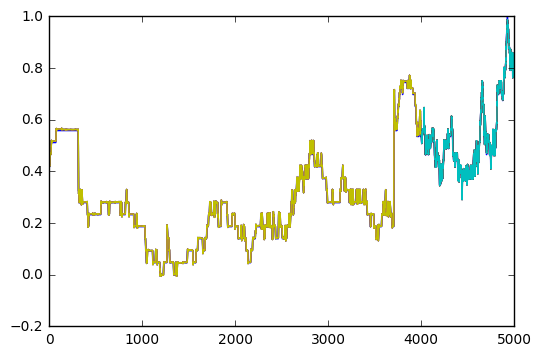

In [22]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
#plt.plot(scaler.inverse_transform(dataset))
plt.plot(dataset[:,0])
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [25]:
model.save("sevenaug.h5")

ANOTHER

In [ ]:
# Theano loaded using : conda install m2w64-toolchain

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

#import pandas_datareader.data as pdr_data
import numpy as np
import pandas as pd
import time
import os
import sys
from collections import deque

from collections import OrderedDict
import copy
#import cPickle as pkl
import random
import sys
import time
import pdb
import os
import logging

import numpy
import theano
#import theano.tensor as tensor
from theano.sandbox.rng_mrg import MRG_RandomStreams as RandomStreams
from theano.ifelse import ifelse
from theano import config

import tensorflow as tf
#import config as c
#from tensorflow.models.rnn import rnn
#from tensorflow.models.rnn import rnn_cell
#from tensorflow.models.rnn import seq2seq

import time
import warnings
import numpy as np
from numpy import newaxis
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [288]:
def build_model(layers):
    model = Sequential()

    model.add(LSTM(
        input_dim=layers[0],
        output_dim=layers[1],
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
        layers[2],
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
        output_dim=layers[3]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop")
    print ("Compilation Time : ", time.time() - start)
    return model

In [309]:
def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    #Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(data, label='Prediction')
        plt.legend()
    plt.show()

In [297]:
model = build_model([5, 50, 100, 1])

Compilation Time :  0.0625004768371582


In [298]:
model.fit(trainX,trainY,batch_size=512,nb_epoch=3,validation_split=0.05)

Train on 3796 samples, validate on 200 samples
Epoch 1/3
3796/3796 [==============================] - 6s - loss: 0.0357 - val_loss: 0.0604
Epoch 2/3
3796/3796 [==============================] - 2s - loss: 0.0062 - val_loss: 0.0192
Epoch 3/3
3796/3796 [==============================] - 2s - loss: 0.0027 - val_loss: 0.0032


In [311]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

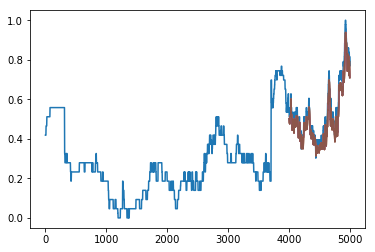

In [345]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
#plt.plot(scaler.inverse_transform(dataset))
plt.plot(dataset[:,0])
#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [317]:
def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    #Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(data, label='Prediction')
        plt.legend()
    plt.show()

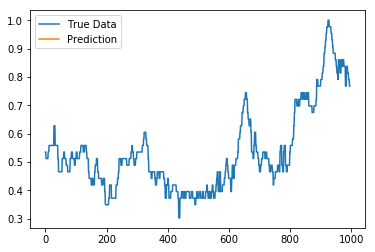

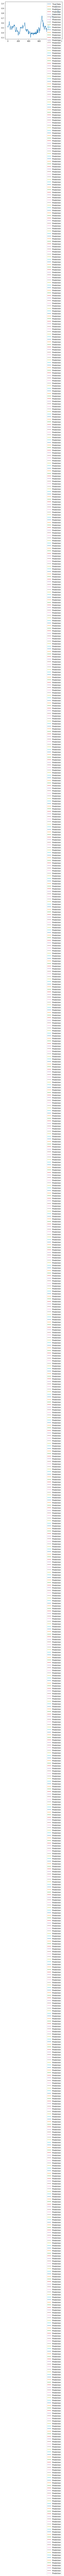

In [318]:
plot_results_multiple(testPredict,testY,10)